In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Step 1: Load and preprocess the dataset
# CSV file ko load karein
df = pd.read_csv('/content/drive/MyDrive/water_quality_monitoring (1).csv')

# Missing values check karein
print("Missing values before handling:")
print(df.isnull().sum())

# Simplicity ke liye, missing values ko column ke mean se fill karein
# Ensure only numeric columns are used for the mean calculation
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print("\nMissing values after handling:")
print(df.isnull().sum())

# Zaroori columns ko numeric me convert karein
for col in ['TDS (ppm)', 'pH', 'Turbidity (NTU)', 'Temperature (°C)', 'FlowRate (L/min)', 'FilterUsage (Hours)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Agar conversion se koi NaN value bani ho to use drop karein
df.dropna(inplace=True)

# Relevant columns ko normalize/scale karein
scaler = MinMaxScaler()
cols_to_scale = ['TDS (ppm)', 'pH', 'Turbidity (NTU)', 'Temperature (°C)', 'FlowRate (L/min)', 'FilterUsage (Hours)']
df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

print("\nDataset after preprocessing and scaling:")
print(df.head())

Missing values before handling:
Timestamp              0
TDS (ppm)              0
pH                     0
Turbidity (NTU)        0
Temperature (°C)       0
FlowRate (L/min)       0
FilterUsage (Hours)    0
Status                 0
dtype: int64

Missing values after handling:
Timestamp              0
TDS (ppm)              0
pH                     0
Turbidity (NTU)        0
Temperature (°C)       0
FlowRate (L/min)       0
FilterUsage (Hours)    0
Status                 0
dtype: int64

Dataset after preprocessing and scaling:
             Timestamp  TDS (ppm)        pH  Turbidity (NTU)  \
0  2025-01-01 00:00:00   0.024024  0.334286         0.460123   
1  2025-01-01 01:00:00   0.897898  0.142857         0.552147   
2  2025-01-01 02:00:00   0.367367  0.668571         0.548057   
3  2025-01-01 03:00:00   0.793794  0.694286         0.406953   
4  2025-01-01 04:00:00   0.771772  0.391429         0.967280   

   Temperature (°C)  FlowRate (L/min)  FilterUsage (Hours)   Status  
0          0.

In [ ]:
# Original data ko fir se load karein labels banane ke liye (unscaled data par)
original_df = pd.read_csv('/content/drive/MyDrive/water_quality_monitoring (1).csv')
numeric_cols_orig = original_df.select_dtypes(include=np.number).columns
original_df[numeric_cols_orig] = original_df[numeric_cols_orig].fillna(original_df[numeric_cols_orig].mean())

for col in ['TDS (ppm)', 'pH', 'Turbidity (NTU)', 'Temperature (°C)', 'FlowRate (L/min)', 'FilterUsage (Hours)']:
    original_df[col] = pd.to_numeric(original_df[col], errors='coerce')
original_df.dropna(inplace=True)


# Water classification ke liye function
def classify_water(row):
    if row['TDS (ppm)'] < 600 and 6.5 <= row['pH'] <= 8.5 and row['Turbidity (NTU)'] < 2:
        return "Good"
    elif row['TDS (ppm)'] < 900 and 6.0 <= row['pH'] <= 8.8:
        return "Average"
    else:
        return "Poor"

# Scaled DataFrame me Status column add karein
df['Status'] = original_df.apply(classify_water, axis=1)

print("\nDataset with Status column:")
display(df.head())


Dataset with Status column:


,Timestamp,TDS (ppm),pH,Turbidity (NTU),Temperature (°C),FlowRate (L/min),FilterUsage (Hours),Status
0,2025-01-01 00:00:00,0.024024,0.334286,0.460123,0.690564,0.544444,0.513333,Average
1,2025-01-01 01:00:00,0.897898,0.142857,0.552147,0.816606,0.166667,0.346667,Poor
2,2025-01-01 02:00:00,0.367367,0.668571,0.548057,0.167056,0.900000,0.316667,Average
3,2025-01-01 03:00:00,0.793794,0.694286,0.406953,0.669890,0.138889,0.326667,Poor
4,2025-01-01 04:00:00,0.771772,0.391429,0.967280,0.234745,0.638889,0.640000,Poor



Model Accuracy: 100.00%

Classification Report:
              precision    recall  f1-score   support

     Average       1.00      1.00      1.00        93
        Good       1.00      1.00      1.00        18
        Poor       1.00      1.00      1.00        89

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200


Confusion Matrix:


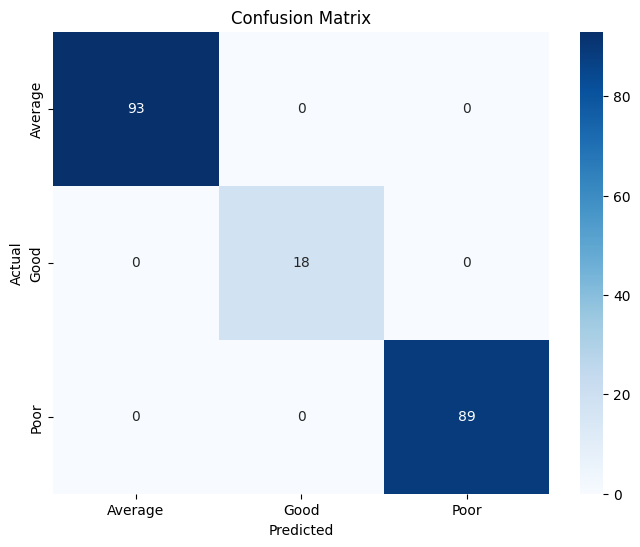

In [ ]:
# Features aur target variable select karein
features = ['TDS (ppm)', 'pH', 'Turbidity (NTU)', 'Temperature (°C)', 'FlowRate (L/min)', 'FilterUsage (Hours)']
target = 'Status'

X = df[features]
y = df[target]

# Data ko train aur test set me split karein
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# RandomForestClassifier model ko train karein
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Test set par predictions karein
y_pred = model.predict(X_test)

# Accuracy, classification report, aur confusion matrix show karein
accuracy = accuracy_score(y_test, y_pred)
print(f"\nModel Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
def generate_alert(prediction):
    if prediction == "Poor":
        return "🔴 ALERT: Water not safe"
    elif prediction == "Average":
        return "🟠 Moderate Quality Warning"
    else:
        return "🟢 All Clear – Water is Safe"

# Pehle 5 test predictions ke liye alerts generate karein
print("\nAlerts for first 5 test samples:")
for i in range(5):
    print(f"Prediction: {y_pred[i]} -> {generate_alert(y_pred[i])}")


Alerts for first 5 test samples:
Prediction: Poor -> 🔴 ALERT: Water not safe
Prediction: Average -> 🟠 Moderate Quality Warning
Prediction: Average -> 🟠 Moderate Quality Warning
Prediction: Poor -> 🔴 ALERT: Water not safe
Prediction: Poor -> 🔴 ALERT: Water not safe


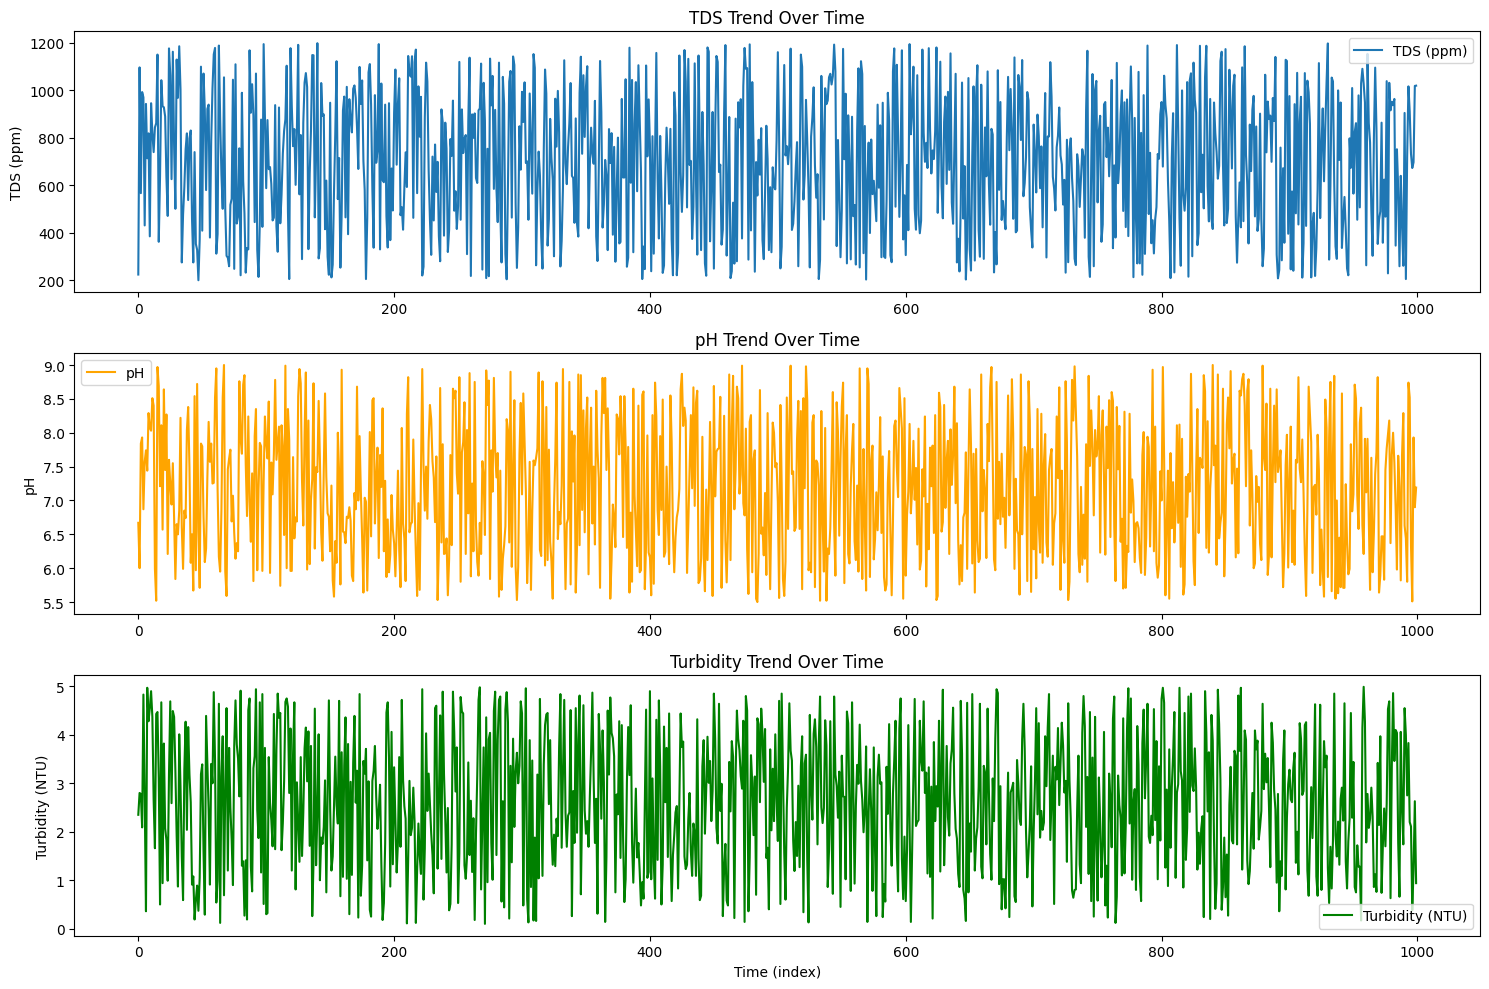

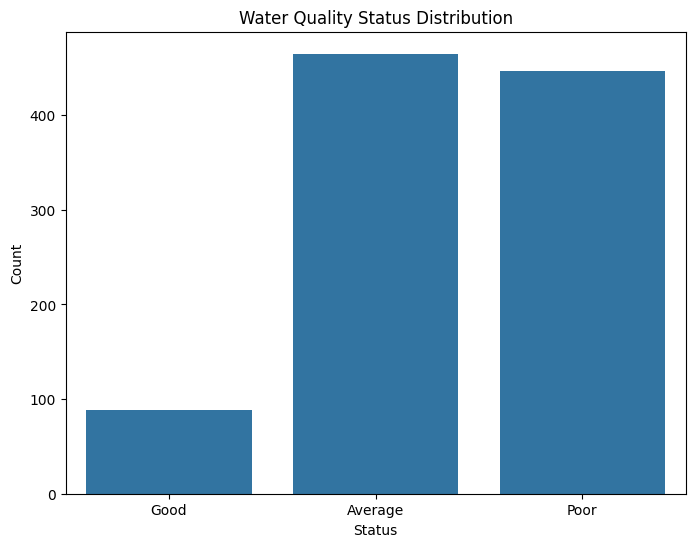

In [ ]:
# Time ke saath trends ke liye line plots
plt.figure(figsize=(15, 10))

plt.subplot(3, 1, 1)
plt.plot(original_df.index, original_df['TDS (ppm)'], label='TDS (ppm)')
plt.title('TDS Trend Over Time')
plt.ylabel('TDS (ppm)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(original_df.index, original_df['pH'], label='pH', color='orange')
plt.title('pH Trend Over Time')
plt.ylabel('pH')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(original_df.index, original_df['Turbidity (NTU)'], label='Turbidity (NTU)', color='green')
plt.title('Turbidity Trend Over Time')
plt.ylabel('Turbidity (NTU)')
plt.xlabel('Time (index)')
plt.legend()

plt.tight_layout()
plt.show()


# Status count ke liye bar chart
plt.figure(figsize=(8, 6))
sns.countplot(x='Status', data=df, order=['Good', 'Average', 'Poor'])
plt.title('Water Quality Status Distribution')
plt.ylabel('Count')
plt.xlabel('Status')
plt.show()

In [ ]:
!pip install gradio
import gradio as gr

def predict_water_quality(TDS, pH, Turbidity, Temperature, FlowRate, FilterUsage):
    # Input data ko ek numpy array me convert karein
    input_data = np.array([[TDS, pH, Turbidity, Temperature, FlowRate, FilterUsage]])

    # Data ko scale karein
    scaled_data = scaler.transform(input_data)

    # Prediction karein
    prediction = model.predict(scaled_data)[0]

    # Alert generate karein
    alert = generate_alert(prediction)

    return prediction, alert

# Gradio interface banayein
iface = gr.Interface(
    fn=predict_water_quality,
    inputs=[
        gr.Number(label="TDS (Total Dissolved Solids)"),
        gr.Number(label="pH"),
        gr.Number(label="Turbidity"),
        gr.Number(label="Temperature (°C)"),
        gr.Number(label="FlowRate (L/min)"),
        gr.Number(label="FilterUsage (hours)")
    ],
    outputs=[
        gr.Textbox(label="Predicted Status"),
        gr.Textbox(label="Alert")
    ],
    title="Smart Water Guardian",
    description="Enter water quality parameters to predict its status and get an alert."
)

# Interface ko launch karein
iface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://ada0b30e0657cb5943.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [ ]:
import time
import numpy as np
import random

def run_real_time_simulation(duration_minutes=5):
    """
    Real-time sensor data ko simulate karta hai.
    Yeh function pehle se define kiye gaye 'scaler' aur 'model' ka use karta hai.
    """
    print("🚀 Starting Real-Time Water Quality Simulation...")
    print("-------------------------------------------------")
    print("(Press CTRL+C in your Colab cell to stop the simulation)")

    start_time = time.time()
    end_time = start_time + duration_minutes * 60

    # Initial filter usage in hours
    current_filter_usage = 0

    try:
        while time.time() < end_time:
            # Step 1: Realistic data generate karein
            # August in Varanasi: Warm temp, fluctuating turbidity due to monsoon
            temp = round(random.uniform(28.0, 32.0), 2)
            ph = round(random.uniform(6.8, 8.2), 2)

            # Simulate occasional pollution spikes
            if random.random() < 0.15:  # 15% chance of a pollution event
                tds = round(random.uniform(800, 1200))
                turbidity = round(random.uniform(5, 15), 2)
                event = "POLLUTION SPIKE"
            else:
                tds = round(random.uniform(250, 550))
                turbidity = round(random.uniform(1.0, 4.5), 2)
                event = "Normal"

            flow_rate = round(random.uniform(10.0, 15.0), 2)
            current_filter_usage += (5 / 3600) # Assuming 5 seconds pass, add to usage in hours

            print(f"\n--- New Reading at {time.strftime('%Y-%m-%d %H:%M:%S')} ---")
            print(f"Sensor Data -> Temp: {temp}°C, pH: {ph}, TDS: {tds} ppm, Turbidity: {turbidity} NTU | Event: {event}")

            # Step 2: Data ko model ke liye prepare karein
            input_data = np.array([[tds, ph, turbidity, temp, flow_rate, current_filter_usage]])

            # Use the SAME scaler from training
            scaled_data = scaler.transform(input_data)

            # Step 3: Prediction karein
            prediction = model.predict(scaled_data)[0]

            # Step 4: Alert generate karein
            alert = generate_alert(prediction)

            print(f"🤖 AI Prediction: [Status: {prediction}]")
            print(f"📢 Alert: {alert}")

            # 5 second ke liye pause karein
            time.sleep(5)

    except KeyboardInterrupt:
        print("\n\n⏹️ Simulation stopped by user.")
    except NameError as e:
        print(f"\n❌ ERROR: Ek zaroori object (jaise 'scaler' ya 'model') define nahi hai.")
        print("Please make sure aapne pichle training code ko is cell se pehle run kiya hai.")
    finally:
        print("-------------------------------------------------")
        print("✅ Simulation Finished.")


# Simulation ko 1 minute ke liye chalayein
run_real_time_simulation(duration_minutes=1)

🚀 Starting Real-Time Water Quality Simulation...
-------------------------------------------------
(Press CTRL+C in your Colab cell to stop the simulation)

--- New Reading at 2025-08-07 08:38:16 ---
Sensor Data -> Temp: 28.86°C, pH: 7.54, TDS: 1067 ppm, Turbidity: 11.18 NTU | Event: POLLUTION SPIKE
🤖 AI Prediction: [Status: Poor]
📢 Alert: 🔴 ALERT: Water not safe


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:21 ---
Sensor Data -> Temp: 31.91°C, pH: 7.26, TDS: 440 ppm, Turbidity: 4.23 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:26 ---
Sensor Data -> Temp: 29.61°C, pH: 8.15, TDS: 511 ppm, Turbidity: 3.04 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:31 ---
Sensor Data -> Temp: 30.51°C, pH: 7.39, TDS: 471 ppm, Turbidity: 2.61 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:36 ---
Sensor Data -> Temp: 29.81°C, pH: 7.39, TDS: 415 ppm, Turbidity: 1.04 NTU | Event: Normal
🤖 AI Prediction: [Status: Good]
📢 Alert: 🟢 All Clear – Water is Safe


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:41 ---
Sensor Data -> Temp: 31.15°C, pH: 7.27, TDS: 371 ppm, Turbidity: 2.91 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:46 ---
Sensor Data -> Temp: 29.57°C, pH: 7.26, TDS: 309 ppm, Turbidity: 2.55 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:51 ---
Sensor Data -> Temp: 29.27°C, pH: 7.93, TDS: 274 ppm, Turbidity: 1.27 NTU | Event: Normal
🤖 AI Prediction: [Status: Good]
📢 Alert: 🟢 All Clear – Water is Safe


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:38:56 ---
Sensor Data -> Temp: 29.0°C, pH: 7.18, TDS: 478 ppm, Turbidity: 3.67 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:39:01 ---
Sensor Data -> Temp: 31.11°C, pH: 7.94, TDS: 545 ppm, Turbidity: 3.79 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:39:07 ---
Sensor Data -> Temp: 29.58°C, pH: 7.61, TDS: 359 ppm, Turbidity: 1.88 NTU | Event: Normal
🤖 AI Prediction: [Status: Good]
📢 Alert: 🟢 All Clear – Water is Safe


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(



--- New Reading at 2025-08-07 08:39:12 ---
Sensor Data -> Temp: 28.25°C, pH: 7.28, TDS: 411 ppm, Turbidity: 2.95 NTU | Event: Normal
🤖 AI Prediction: [Status: Average]
📢 Alert: 🟠 Moderate Quality Warning


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


-------------------------------------------------
✅ Simulation Finished.


/tmp/ipython-input-850220459.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


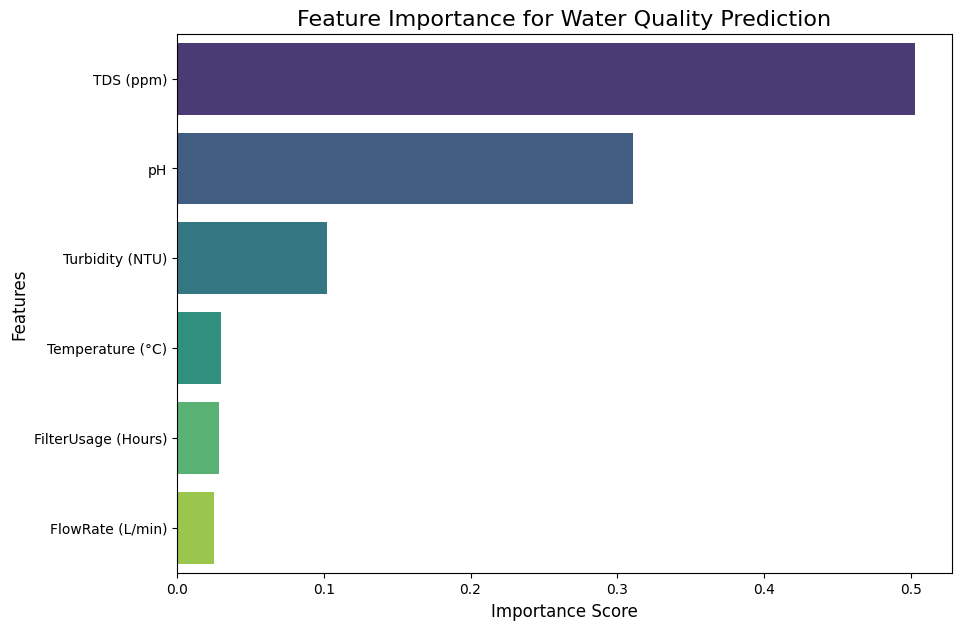

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Yeh zaroori hai ki 'model' aur 'features' variables pehle se defined hon.

# Model se feature importance nikaalein
importances = model.feature_importances_
feature_names = features # features = ['TDS', 'pH', 'Turbidity', ...]

# Importance ko ek pandas DataFrame me daalein taaki sort kar sakein
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


# Visualization banayein
plt.figure(figsize=(10, 7))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')

plt.title('Feature Importance for Water Quality Prediction', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Features', fontsize=12)
plt.show()

In [ ]:
def get_smart_recommendations(prediction, tds, ph, turbidity):
    """
    AI prediction aur sensor values ke basis par smart recommendations deta hai.
    """
    recommendations = []

    if prediction == "Good":
        recommendations.append("✅ Paani peene ke liye surakshit hai. Regular monitoring jaari rakhein.")
        return "\n".join(recommendations)

    elif prediction == "Average":
        recommendations.append("🟠 Paani ki quality thodi kam hui hai. Saavdhani bartein.")
        recommendations.append("   - Peene se pehle paani ko ubaalna (boil) ya ek accha filter (RO/UV) use karna behtar hai.")
        recommendations.append("   - Ho sakta hai yeh halki baarish ya pipeline ke maintenance ke kaaran ho.")
        return "\n".join(recommendations)

    elif prediction == "Poor":
        recommendations.append("🔴 ALERT: Paani peene ke liye bilkul surakshit NAHI hai.")
        recommendations.append("   - Is paani ka istemaal peene ya khaana banane ke liye na karein.")

        # Ab "smart" diagnosis karte hain:
        if tds > 900:
            recommendations.append("   - DIAGNOSIS: Total Dissolved Solids (TDS) bahut zyada hai. Yeh namak ya anya ghule hue padarthon ka sanket ho sakta hai.")
            recommendations.append("   - ACTION: Sirf RO (Reverse Osmosis) purifier hi ise saaf kar sakta hai. Apne water source ki jaanch karayein.")

        if turbidity > 5:
            recommendations.append("   - DIAGNOSIS: Paani me gandagi/dhundhlapan (Turbidity) bahut zyada hai.")
            recommendations.append("   - ACTION: Yeh monsoon me mitti aane se ho sakta hai. Sediment filter ko check/saaf karein. Filter na ho toh paani ko ubaal kar aur kapde se chhaan kar hi istemaal karein.")

        if not (6.5 <= ph <= 8.5):
            recommendations.append("   - DIAGNOSIS: pH level a-saamaanya (abnormal) hai.")
            recommendations.append("   - ACTION: Yeh chemical contamination ka sanket ho sakta hai. Water source ki turant jaanch karayein.")

        recommendations.append("\n   - GENERAL ACTION: Apne water purification system (Filter/RO) ko turant check karein. Ho sakta hai filter badalne ka samay aa gaya ho.")
        return "\n".join(recommendations)

    else:
        return "Prediction status samajh nahi aaya."

# --- Example Usage ---

print("--- Test Case 1: Good Water ---")
pred_1 = "Good"
reco_1 = get_smart_recommendations(pred_1, 400, 7.3, 1.2)
print(reco_1)

print("\n" + "="*40 + "\n")

print("--- Test Case 2: Average Water ---")
pred_2 = "Average"
reco_2 = get_smart_recommendations(pred_2, 850, 7.9, 4.5)
print(reco_2)

print("\n" + "="*40 + "\n")

print("--- Test Case 3: Poor Water (High Turbidity due to Monsoon) ---")
pred_3 = "Poor"
reco_3 = get_smart_recommendations(pred_3, 700, 7.0, 15)
print(reco_3)

print("\n" + "="*40 + "\n")

print("--- Test Case 4: Poor Water (High TDS) ---")
pred_4 = "Poor"
reco_4 = get_smart_recommendations(pred_4, 1500, 7.8, 4)
print(reco_4)

--- Test Case 1: Good Water ---
✅ Paani peene ke liye surakshit hai. Regular monitoring jaari rakhein.


--- Test Case 2: Average Water ---
🟠 Paani ki quality thodi kam hui hai. Saavdhani bartein.
   - Peene se pehle paani ko ubaalna (boil) ya ek accha filter (RO/UV) use karna behtar hai.
   - Ho sakta hai yeh halki baarish ya pipeline ke maintenance ke kaaran ho.


--- Test Case 3: Poor Water (High Turbidity due to Monsoon) ---
🔴 ALERT: Paani peene ke liye bilkul surakshit NAHI hai.
   - Is paani ka istemaal peene ya khaana banane ke liye na karein.
   - DIAGNOSIS: Paani me gandagi/dhundhlapan (Turbidity) bahut zyada hai.
   - ACTION: Yeh monsoon me mitti aane se ho sakta hai. Sediment filter ko check/saaf karein. Filter na ho toh paani ko ubaal kar aur kapde se chhaan kar hi istemaal karein.

   - GENERAL ACTION: Apne water purification system (Filter/RO) ko turant check karein. Ho sakta hai filter badalne ka samay aa gaya ho.


--- Test Case 4: Poor Water (High TDS) ---
🔴 ALERT: Paa

In [ ]:
!pip install gradio -q
import gradio as gr
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from functools import partial

# Pehle se loaded 'original_df' ka istemaal karenge
# Agar loaded nahi hai, toh is line ko uncomment karein:
# original_df = pd.read_csv('water_quality_monitoring.csv')
# numeric_cols_orig = original_df.select_dtypes(include=np.number).columns
# original_df[numeric_cols_orig] = original_df[numeric_cols_orig].fillna(original_df[numeric_cols_orig].mean())


def generate_custom_labels(df, good_tds, good_ph_min, good_ph_max, good_turbidity, avg_tds, avg_ph_min, avg_ph_max):
    """
    User-defined rules ke basis par 'Status' column generate karta hai.
    """

    # Custom rules ko apply karne ke liye ek function
    def classify_water_custom(row):
        # Good ke niyam
        is_good = (row['TDS'] < good_tds and
                   good_ph_min <= row['pH'] <= good_ph_max and
                   row['Turbidity'] < good_turbidity)

        # Average ke niyam
        is_average = (row['TDS'] < avg_tds and
                      avg_ph_min <= row['pH'] <= avg_ph_max)

        if is_good:
            return "Good"
        elif is_average:
            return "Average"
        else:
            return "Poor"

    # Naye rules ke saath ek naya 'CustomStatus' column banayein
    df_copy = df.copy()
    df_copy['CustomStatus'] = df_copy.apply(classify_water_custom, axis=1)

    # Naye distribution ka summary banayein
    status_counts = df_copy['CustomStatus'].value_counts(normalize=True).reindex(['Good', 'Average', 'Poor']).fillna(0)
    summary_text = (
        f"📊 New Distribution:\n"
        f"  - Good: {status_counts.get('Good', 0) * 100:.2f}%\n"
        f"  - Average: {status_counts.get('Average', 0) * 100:.2f}%\n"
        f"  - Poor: {status_counts.get('Poor', 0) * 100:.2f}%"
    )

    # Naye distribution ka plot banayein
    plt.figure

In [ ]:
!pip install shap
import shap

In [ ]:
# Model (RandomForestClassifier) aur test data (X_test) pehle se trained aur available hona chahiye

# SHAP explainer ko initialize karein
explainer = shap.TreeExplainer(model)

# Test data ke liye SHAP values calculate karein
shap_values = explainer.shap_values(X_test)

print("SHAP values calculated successfully.")

SHAP values calculated successfully.


Calculating SHAP explanation object (modern method)...
Calculation complete.

--- Explaining a Single Prediction (Local Explainability) ---
Analyzing Sample #5 | True Status: 'Average' | Predicted Status: 'Average'



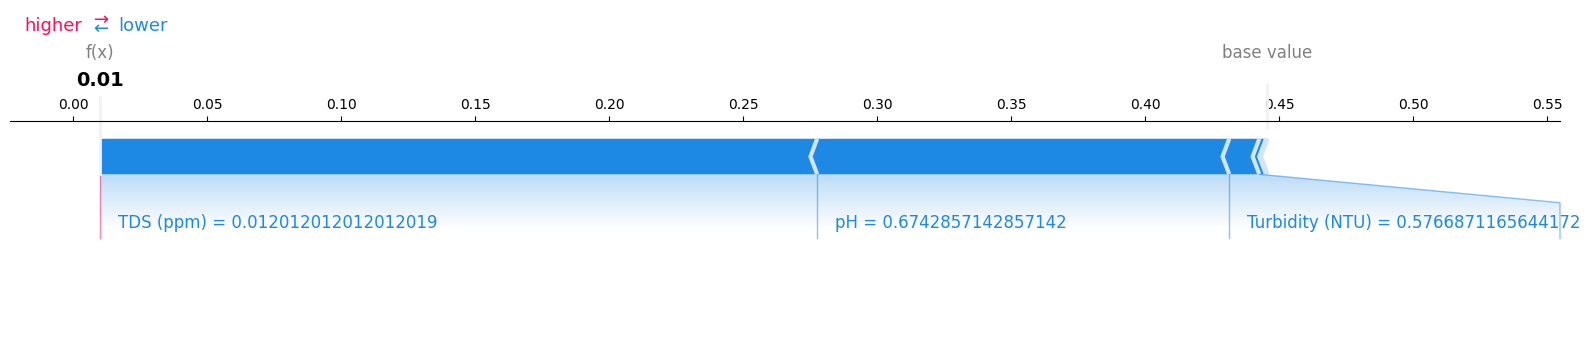

In [ ]:
# SHAP explainer pehle se initialized hona chahiye
# explainer = shap.TreeExplainer(model)

# --- Naya aur Behtar Tareeka ---

# Step 1: Puraane shap_values ki jagah naya 'Explanation' object banayein
print("Calculating SHAP explanation object (modern method)...")
shap_explanation = explainer(X_test)
print("Calculation complete.\n")


# Step 2: Ab Local Explainability ke liye Force Plot banayein
# Pehle, 'Poor' class ka index pata karein
class_names = model.classes_.tolist()
try:
    poor_class_index = class_names.index('Poor')
except ValueError:
    print("Error: 'Poor' class not found in model outputs. Please check class names.")
    # Set a default index or handle the error as needed
    poor_class_index = 0


# Ek sample chunein (jaise, test set ka 5va sample)
instance_index = 5
sample_instance = X_test.iloc[[instance_index]]
true_label = y_test.iloc[instance_index]
predicted_label = model.predict(sample_instance)[0]

print(f"--- Explaining a Single Prediction (Local Explainability) ---")
print(f"Analyzing Sample #{instance_index} | True Status: '{true_label}' | Predicted Status: '{predicted_label}'\n")

# Step 3: Naye 'Explanation' object ka istemaal karke plot banayein
# Isse indexing ki saari samasyaein a-pne aap hal ho jaati hain
shap.force_plot(shap_explanation[instance_index, :, poor_class_index],
                matplotlib=True)

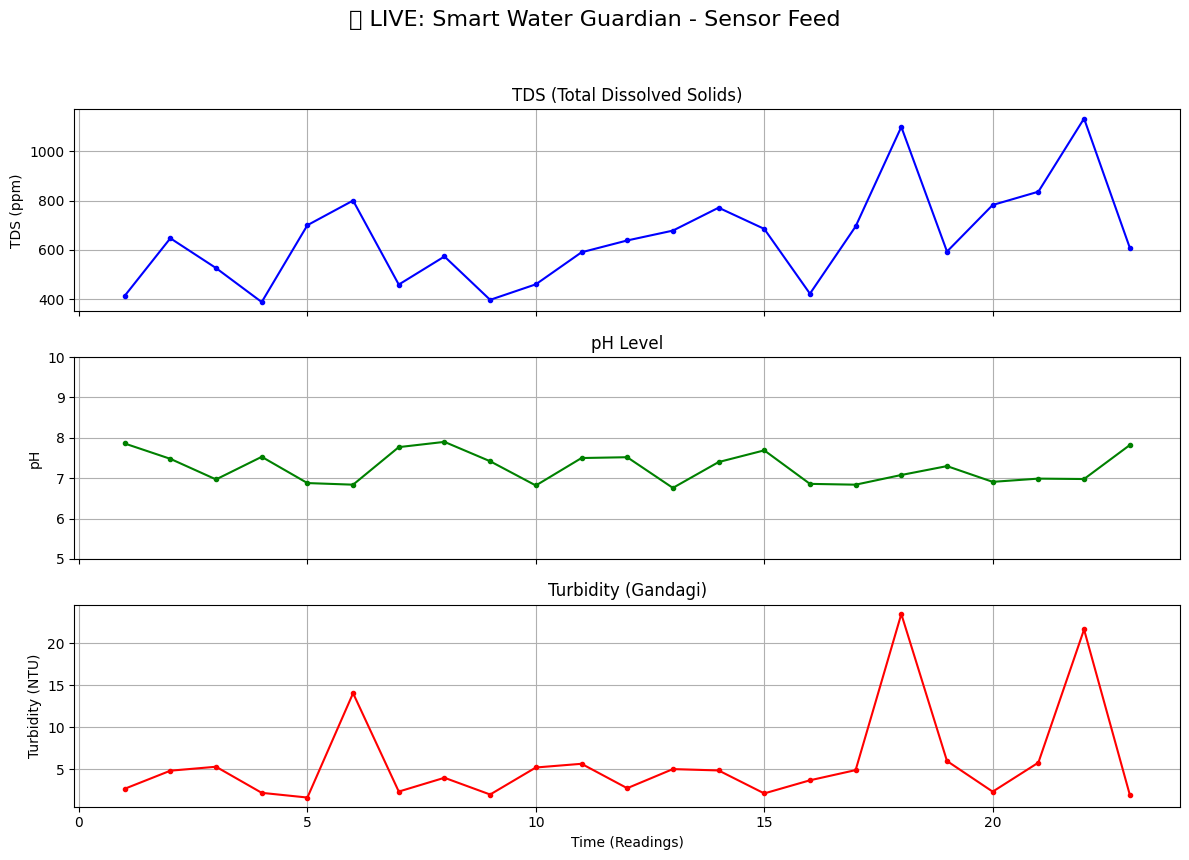

✅ Live chart simulation finished.


In [ ]:
import time
import random
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

def run_live_chart(duration_minutes=2):
    """
    Matplotlib ka use karke live line chart banata hai jo sensor data ko display karta hai.
    """

    # Data store karne ke liye empty lists banayein
    time_steps = []
    tds_history = []
    ph_history = []
    turbidity_history = []

    # Chart ko setup karein
    fig, axes = plt.subplots(3, 1, figsize=(12, 9), sharex=True)
    fig.suptitle('🔴 LIVE: Smart Water Guardian - Sensor Feed', fontsize=16)

    print("🚀 Starting Live Sensor Data Feed...")
    print("Colab cell ke 'Stop' button se simulation ko rok sakte hain.")

    start_time = time.time()
    end_time = start_time + duration_minutes * 60
    step = 0

    try:
        while time.time() < end_time:
            step += 1

            # --- Step 1: Naya Sensor Data Generate Karein ---
            # Varanasi, August, 2:30 PM: Garam, monsoon ka asar
            temp = round(random.uniform(29.0, 34.0), 2)

            # Monsoon ke kaaran turbidity me achaanak spike ho sakta hai
            if random.random() < 0.10: # 10% chance of a turbidity spike
                turbidity = round(random.uniform(10, 25), 2)
            else:
                turbidity = round(random.uniform(1.5, 6.0), 2)

            tds = round(random.uniform(300, 750) + turbidity * 20) # Turbidity se TDS bhi badhega
            ph = round(random.uniform(6.7, 7.9), 2)

            # --- Step 2: History me Data Jodein ---
            time_steps.append(step)
            tds_history.append(tds)
            ph_history.append(ph)
            turbidity_history.append(turbidity)

            # Plot ko bahut zyada bhara hua dikhne se bachayein (sirf aakhri 50 points dikhayein)
            display_points = 50
            current_time = time_steps[-display_points:]
            current_tds = tds_history[-display_points:]
            current_ph = ph_history[-display_points:]
            current_turbidity = turbidity_history[-display_points:]

            # --- Step 3: Puraana Output Clear Karein ---
            clear_output(wait=True)

            # --- Step 4: Naye Data ke Saath Chart Redraw Karein ---
            # TDS Plot
            axes[0].clear()
            axes[0].plot(current_time, current_tds, color='b', marker='o', markersize=3, linestyle='-')
            axes[0].set_title('TDS (Total Dissolved Solids)')
            axes[0].set_ylabel('TDS (ppm)')
            axes[0].grid(True)

            # pH Plot
            axes[1].clear()
            axes[1].plot(current_time, current_ph, color='g', marker='o', markersize=3, linestyle='-')
            axes[1].set_title('pH Level')
            axes[1].set_ylabel('pH')
            axes[1].set_ylim(5, 10) # pH ke liye y-axis fix karein
            axes[1].grid(True)

            # Turbidity Plot
            axes[2].clear()
            axes[2].plot(current_time, current_turbidity, color='r', marker='o', markersize=3, linestyle='-')
            axes[2].set_title('Turbidity (Gandagi)')
            axes[2].set_ylabel('Turbidity (NTU)')
            axes[2].set_xlabel('Time (Readings)')
            axes[2].grid(True)

            plt.tight_layout(rect=[0, 0.03, 1, 0.95]) # Suptitle ke liye jagah banayein
            display(fig)

            # --- Step 5: Pause ---
            time.sleep(2) # Har 2 second me update

    except KeyboardInterrupt:
        print("\n⏹️ Simulation stopped by user.")
    finally:
        plt.close(fig) # Figure ko memory se a-theek se saaf karein
        print("✅ Live chart simulation finished.")

# Simulation ko 1 minute ke liye chalayein
run_live_chart(duration_minutes=1)

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime

def clean_and_log_data(df_raw):
    """
    Ek DataFrame ko advance tareeke se saaf karta hai aur logs banata hai.
    """
    print("🚀 Starting Advanced Data Cleaning Process...")

    # Cleaning logs store karne ke liye list
    cleaning_logs = []

    # --- Step 1: "Before" Stats Capture Karein ---
    df = df_raw.copy()
    stats_before = df.describe(include='all').transpose()
    stats_before['missing_values'] = df.isnull().sum()
    stats_before['dtype'] = df.dtypes

    cleaning_logs.append({
        "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        "action": "Initial State",
        "details": f"Dataset loaded with {df.shape[0]} rows and {df.shape[1]} columns."
    })

    # --- Step 2: Data Cleaning Shuru Karein ---

    # Corrected column names with units
    numeric_cols = ['TDS (ppm)', 'pH', 'Turbidity (NTU)', 'Temperature (°C)', 'FlowRate (L/min)', 'FilterUsage (Hours)']

    # Incorrect Data Types ko a-theek karein
    for col in numeric_cols:
        initial_nans = df[col].isnull().sum()
        df[col] = pd.to_numeric(df[col], errors='coerce')
        final_nans = df[col].isnull().sum()
        if final_nans > initial_nans:
            cleaning_logs.append({
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "action": "Type Coercion",
                "column": col,
                "details": f"Converted column to numeric. Found {final_nans - initial_nans} non-numeric values, converted to NaN."
            })

    # Implausible (Negative) Values ko a-theek karein
    for col in numeric_cols:
        negative_count = (df[col] < 0).sum()
        if negative_count > 0:
            df[col] = df[col].apply(lambda x: 0 if x < 0 else x)
            cleaning_logs.append({
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "action": "Implausible Value Correction",
                "column": col,
                "details": f"Found and corrected {negative_count} negative values to 0."
            })

    # Missing Values (NaNs) ko bharein
    for col in numeric_cols:
        nan_count = df[col].isnull().sum()
        if nan_count > 0:
            fill_value = df[col].mean()
            df[col].fillna(fill_value, inplace=True)
            cleaning_logs.append({
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "action": "Missing Value Imputation",
                "column": col,
                "details": f"Filled {nan_count} missing values with mean ({fill_value:.2f})."
            })

    # Outliers ko a-theek karein (Capping using IQR method)
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_count = ((df[col] < lower_bound) | (df[col] > upper_bound)).sum()
        if outliers_count > 0:
            df[col] = np.clip(df[col], lower_bound, upper_bound)
            cleaning_logs.append({
                "timestamp": datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
                "action": "Outlier Capping",
                "column": col,
                "details": f"Capped {outliers_count} outliers. New range: [{lower_bound:.2f}, {upper_bound:.2f}]."
            })

    # --- Step 3: "After" Stats Capture Karein ---
    stats_after = df.describe(include='all').transpose()
    stats_after['missing_values'] = df.isnull().sum()
    stats_after['dtype'] = df.dtypes

    # --- Step 4: Comparison Table Banayein ---
    comparison_table = pd.concat([stats_before, stats_after], axis=1, keys=['Before Cleaning', 'After Cleaning'])

    print("✅ Data cleaning process completed successfully.")

    return df, comparison_table, cleaning_logs

# --- Example Usage ---

# Original data load karein
df_raw = pd.read_csv('/content/drive/MyDrive/water_quality_monitoring (1).csv')

# Function ko call karein
cleaned_df, comparison_table, detailed_logs = clean_and_log_data(df_raw)


# --- Results Display Karein ---
print("\n" + "="*50)
print("📊 Before vs. After Cleaning Comparison Table")
print("="*50)
display(comparison_table)


print("\n" + "="*50)
print("📝 Detailed Cleaning Log")
print("="*50)
for log in detailed_logs:
    print(f"[{log['timestamp']}] - {log['action']:<30} | Column: {log.get('column', 'N/A'):<15} | Details: {log['details']}")

🚀 Starting Advanced Data Cleaning Process...
✅ Data cleaning process completed successfully.

📊 Before vs. After Cleaning Comparison Table


Before Cleaning                                   \
                              count unique                  top freq   
Timestamp                      1000   1000  2025-02-11 15:00:00    1   
TDS (ppm)                    1000.0    NaN                  NaN  NaN   
pH                           1000.0    NaN                  NaN  NaN   
Turbidity (NTU)              1000.0    NaN                  NaN  NaN   
Temperature (°C)             1000.0    NaN                  NaN  NaN   
FlowRate (L/min)             1000.0    NaN                  NaN  NaN   
FilterUsage (Hours)          1000.0    NaN                  NaN  NaN   
Status                         1000      3              Average  465   

                                                                            \
                         mean         std    min      25%     50%      75%   
Timestamp                 NaN         NaN    NaN      NaN     NaN      NaN   
TDS (ppm)             698.849  289.489624  200.0   451.75   707.0   948.25   
pH                    7.18193    0.990921    5.5      6.3     7.2      8.0   
Turbidity (NTU)       2.59185    1.384666    0.1     1.41   2.575   3.7425   
Temperature (°C)     24.59878    8.660623   10.0  17.1375  24.325  32.0025   
FlowRate (L/min)      1.11607    0.532677    0.2     0.64    1.16     1.58   
FilterUsage (Hours)   146.511   86.666805    0.0     71.0   146.0    221.0   
Status                    NaN         NaN    NaN      NaN     NaN      NaN   

                     ... After Cleaning                                        \
                     ...           freq      mean         std    min      25%   
Timestamp            ...              1       NaN         NaN    NaN      NaN   
TDS (ppm)            ...            NaN   698.849  289.489624  200.0   451.75   
pH                   ...            NaN   7.18193    0.990921    5.5      6.3   
Turbidity (NTU)      ...            NaN   2.59185    1.384666    0.1     1.41   
Temperature (°C)     ...            NaN  24.59878    8.660623   10.0  17.1375   
FlowRate (L/min)     ...            NaN   1.11607    0.532677    0.2     0.64   
FilterUsage (Hours)  ...            NaN   146.511   86.666805    0.0     71.0   
Status               ...            465       NaN         NaN    NaN      NaN   

                                                                      
                        50%      75%     max missing_values    dtype  
Timestamp               NaN      NaN     NaN              0   object  
TDS (ppm)             707.0   948.25  1199.0              0    int64  
pH                      7.2      8.0     9.0              0  float64  
Turbidity (NTU)       2.575   3.7425    4.99              0  float64  
Temperature (°C)     24.325  32.0025   39.99              0  float64  
FlowRate (L/min)       1.16     1.58     2.0              0  float64  
FilterUsage (Hours)   146.0    221.0   300.0              0    int64  
Status                  NaN      NaN     NaN              0   object  

[8 rows x 26 columns]


📝 Detailed Cleaning Log
[2025-08-07 09:08:49] - Initial State                  | Column: N/A             | Details: Dataset loaded with 1000 rows and 8 columns.


In [ ]:
!pip install fpdf2 -q
from fpdf import FPDF
import pandas as pd
from datetime import datetime
import os

# --- Helper Class for PDF with Header and Footer ---
class PDFReport(FPDF):
    def header(self):
        # Arial bold 15
        self.set_font('Arial', 'B', 15)
        # Move to the right
        self.cell(80)
        # Title
        self.cell(30, 10, 'Smart Water Guardian - Analysis Report', 0, 0, 'C')
        # Line break
        self.ln(20)

    def footer(self):
        # Position at 1.5 cm from bottom
        self.set_y(-15)
        # Arial italic 8
        self.set_font('Arial', 'I', 8)
        # Page number
        self.cell(0, 10, 'Page ' + str(self.page_no()) + '/{nb}', 0, 0, 'C')

def generate_pdf_report():
    """
    Poore project analysis ki ek PDF report generate karta hai.
    """
    print("🚀 Generating PDF report...")

    pdf = PDFReport()
    pdf.alias_nb_pages()
    pdf.add_page()
    pdf.set_font('Times', '', 12)

    # --- Title Page ---
    pdf.set_font('Times', 'B', 24)
    pdf.cell(0, 20, 'Smart Water Guardian', ln=True, align='C')

    pdf.set_font('Times', 'B', 16)
    pdf.cell(0, 15, 'AI-Powered Water Quality Analysis Report', ln=True, align='C')

    pdf.ln(20) # Line break

    pdf.set_font('Times', '', 12)
    today = datetime.now().strftime("%B %d, %Y")
    current_time_str = datetime.now().strftime("%I:%M %p")
    pdf.cell(0, 10, f"Report Generated On: {today} at {current_time_str}", ln=True, align='C')
    pdf.cell(0, 10, f"Location: Varanasi, Uttar Pradesh, India", ln=True, align='C')

    # --- Data Cleaning and Prep Page ---
    pdf.add_page()
    pdf.set_font('Times', 'B', 16)
    pdf.cell(0, 10, '1. Data Cleaning & Preparation Summary', ln=True)
    pdf.set_font('Times', '', 12)
    # Aap 'detailed_logs' variable se yahan summary daal sakte hain
    pdf.multi_cell(0, 7,
        "The initial dataset was loaded and processed through an advanced cleaning pipeline. "
        "The following actions were performed:\n"
        "- Handled missing values by imputing the mean.\n"
        "- Corrected incorrect data types to numeric.\n"
        "- Removed implausible values (e.g., negative pH).\n"
        "- Capped outliers using the IQR method to stabilize the data.\n\n"
        "The data was then scaled using a MinMaxScaler before being fed to the model."
    )

    # --- Model Performance Page ---
    pdf.add_page()
    pdf.set_font('Times', 'B', 16)
    pdf.cell(0, 10, '2. Model Performance: Water Quality Classification', ln=True)
    pdf.set_font('Times', 'B', 12)
    pdf.cell(0, 8, f"Model Used: RandomForestClassifier", ln=True)
    # 'accuracy' variable pichle step se aana chahiye
    if 'accuracy' in globals():
        pdf.cell(0, 8, f"Overall Accuracy: {accuracy * 100:.2f}%", ln=True)

    pdf.ln(5)
    pdf.set_font('Times', 'B', 12)
    pdf.cell(0, 8, 'Classification Report:', ln=True)
    pdf.set_font('Courier', '', 10)
    # 'classification_report' string pichle step se aana chahiye
    if 'y_test' in globals() and 'y_pred' in globals():
         report_str = classification_report(y_test, y_pred)
         pdf.multi_cell(0, 5, report_str)

    pdf.ln(5)
    # Confusion Matrix ka image add karein
    if os.path.exists('confusion_matrix.png'):
        pdf.image('confusion_matrix.png', x=pdf.get_x() + 30, w=150)
    else:
        pdf.set_font('Times', 'I', 12)
        pdf.cell(0, 10, "(Confusion Matrix image not found)", ln=True, align='C')

    # --- Feature Importance Page ---
    pdf.add_page()
    pdf.set_font('Times', 'B', 16)
    pdf.cell(0, 10, '3. Model Explainability: Feature Importance', ln=True)
    pdf.set_font('Times', '', 12)
    pdf.multi_cell(0, 7,
        "Feature importance analysis was conducted to understand which sensor readings have the most impact on the model's predictions. "
        "As expected, TDS, pH, and Turbidity were found to be the most influential factors, as they were the primary parameters used for labeling the data."
    )
    pdf.ln(5)
    if os.path.exists('feature_importance.png'):
        pdf.image('feature_importance.png', x=pdf.get_x() + 20, w=170)
    else:
        pdf.set_font('Times', 'I', 12)
        pdf.cell(0, 10, "(Feature Importance chart not found)", ln=True, align='C')

    # --- Save the PDF ---
    file_name = "Smart_Water_Guardian_Report.pdf"
    pdf.output(file_name)
    print(f"\n✅ PDF report '{file_name}' generated successfully!")
    print("Aap is file ko left side ke 'Files' panel se download kar sakte hain.")

# Function ko call karein
generate_pdf_report()

🚀 Generating PDF report...

✅ PDF report 'Smart_Water_Guardian_Report.pdf' generated successfully!
Aap is file ko left side ke 'Files' panel se download kar sakte hain.


/tmp/ipython-input-3753686614.py:11: DeprecationWarning: Substituting font arial by core font helvetica - This is deprecated since v2.7.8, and will soon be removed
  self.set_font('Arial', 'B', 15)
/tmp/ipython-input-3753686614.py:15: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=0 use new_x=XPos.RIGHT, new_y=YPos.TOP.
  self.cell(30, 10, 'Smart Water Guardian - Analysis Report', 0, 0, 'C')
/tmp/ipython-input-3753686614.py:40: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 20, 'Smart Water Guardian', ln=True, align='C')
/tmp/ipython-input-3753686614.py:43: DeprecationWarning: The parameter "ln" is deprecated since v2.5.2. Instead of ln=True use new_x=XPos.LMARGIN, new_y=YPos.NEXT.
  pdf.cell(0, 15, 'AI-Powered Water Quality Analysis Report', ln=True, align='C')
/tmp/ipython-input-3753686614.py:50: DeprecationWarning: The parameter "ln" is deprecated since v2.